# Task 2 Evaluation for Prediction of Column Types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Initialize label list 

In [2]:
label_list = ['person_name', 'business_name', 'phone_number', 'address', 'street_name', 'city', 'neighborhood',
              'lat_lon_cord', 'zip_code', 'borough', 'school_name', 'color', 'car_make', 'city_agency', 'area_of_study',
              'subject_in_school', 'school_level', 'college_name', 'website', 'building_classification', 'vehicle_type',
              'location_type', 'park_playground', 'other']

Read data from real_label and predict_label and join them

In [8]:
true_label = pd.read_csv("real_label.csv")
pred_label_with_column_name = pd.read_csv("predict_label_with_column_name.csv")
pred_label_without_column_name = pd.read_csv("predict_label_without_column_name.csv")
result = pd.merge(true_label, pred_label_with_column_name, how='inner', on='column_name')
result = pd.merge(result, pred_label_without_column_name, how='inner', on='column_name')
# result

Calculate the precision and recall for all labels

In [21]:
precision = []
precision_without = []
recall = []
recall_without = []
for label in label_list:
    TP = len(result[result['true_label'].str.contains(label) & result['predict_label_with_column_name'].str.contains(label)])
    TP_without = len(result[result['true_label'].str.contains(label) & result['predict_label_without_column_name'].str.contains(label)])
    all_pred = len(result[result['predict_label_with_column_name'].str.contains(label)])
    all_pred_without = len(result[result['predict_label_without_column_name'].str.contains(label)])
    all_actual = len(result[result['true_label'].str.contains(label)])
    precision.append(float(TP) / all_pred if all_pred != 0 else 0)
    precision_without.append(float(TP_without) / all_pred_without if all_pred_without != 0 else 0)
    recall.append(float(TP) / all_actual if all_actual != 0 else 0)
    recall_without.append(float(TP_without) / all_actual if all_actual != 0 else 0)

In [24]:
res_data = pd.DataFrame({'label': label_list, 'precision': precision, 'recall': recall, 'precision_without': precision_without, 'recall_without': recall_without})
display(res_data)

,label,precision,recall,precision_without,recall_without
0,person_name,1.000000,0.958333,0.000000,0.000000
1,business_name,0.363636,0.800000,0.363636,0.800000
2,phone_number,1.000000,1.000000,1.000000,1.000000
3,address,0.866667,0.928571,1.000000,0.857143
4,street_name,0.913043,0.954545,1.000000,0.954545
5,city,0.958333,0.958333,1.000000,0.041667
6,neighborhood,0.736842,1.000000,0.722222,0.928571
7,lat_lon_cord,0.909091,1.000000,1.000000,1.000000
8,zip_code,1.000000,1.000000,1.000000,1.000000
9,borough,1.000000,0.857143,1.000000,0.428571


Draw the scatter graph for all the labels with precision and recall

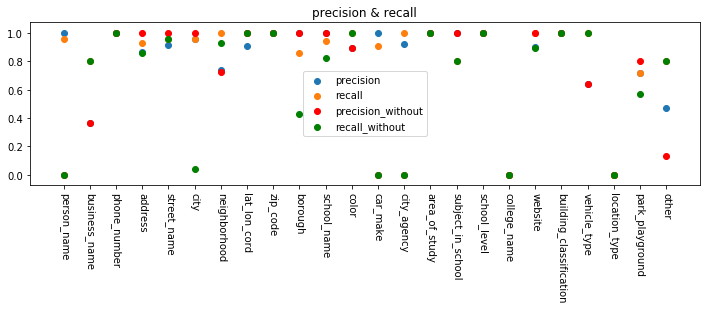

In [32]:
plt.figure(figsize=(12, 3))
plt.title('precision & recall')
plt.scatter(label_list, precision, label='precision')
plt.scatter(label_list, recall, label='recall')
plt.scatter(label_list, precision_without, color='r',label='precision_without')
plt.scatter(label_list, recall_without, color='g',label='recall_without')
plt.xticks(rotation=270)
plt.legend(loc='best')
plt.show()

In [29]:
# plt.figure(figsize=(12, 3))
# plt.title('precision_without & recall_without')
# plt.xticks(rotation=270)
# plt.legend(loc='lower left')
# plt.show()